<a href="https://colab.research.google.com/github/OwenHimmel/DS3001labs/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:

level - Level of institution (4-year, 2-year)
aid_value - The average amount of student aid going to undergraduate recipients
control - Public, Private not-for-profit, Private for-profit
grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

Load the ./data/college_completion.csv data with Pandas.

What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
Cross tabulate control and level. Describe the patterns you see.
For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?
Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.
Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [27]:
#Load the ./data/college_completion.csv data with Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/college_completion.csv')
df = pd.DataFrame(df)


In [ ]:
#Data dimensions, how many observations?
df.info()


3978 x 63 dataframe. 3978 observations

In [ ]:
#What variables?

df.head()

Lots.
Imagine the following is seperated by commas:

index	unitid	chronname	city	state	level	control	basic	hbcu	flagship	...	vsa_grad_after6_transfer	vsa_grad_elsewhere_after6_transfer	vsa_enroll_after6_transfer	vsa_enroll_elsewhere_after6_transfer	similar	state_sector_ct	carnegie_ct	counted_pct	nicknames	cohort_size

In [13]:
#Cross tabulate control and level
pd.crosstab(df['control'], df['level'])


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


There is a roughly equal amount of 2 year and 4 year for-profit colleges and universities. However, there are many (a thousand) more 4 year not for profit schools compared to 2 year not for profit schools. There are more public 2 year schools then all private 2 year schools and less 4 year public schools than 2 year public schools.

In [24]:
# For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


<Axes: >

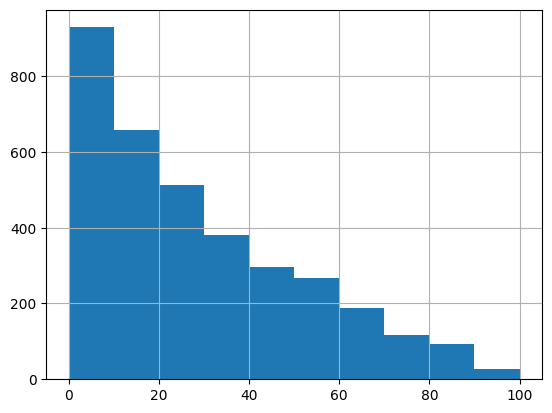

In [23]:
df['grad_100_value'].hist()


<Axes: ylabel='Density'>

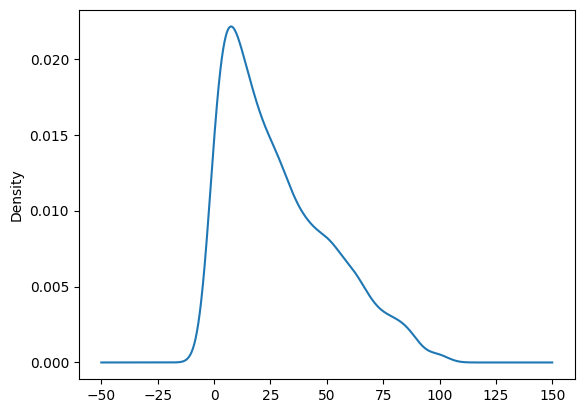

In [22]:
df['grad_100_value'].plot.kde()


<Axes: >

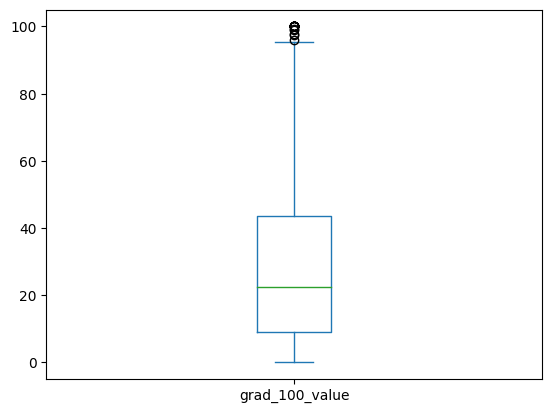

In [21]:
df['grad_100_value'].plot.box()

count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                       4-year  21.8  33.800   86.3

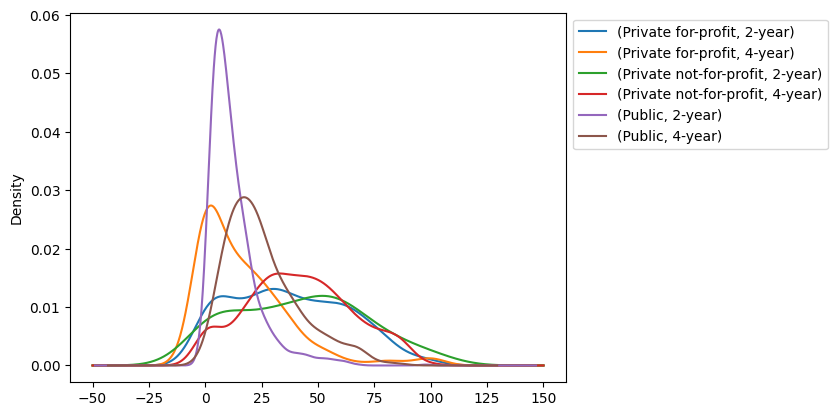

In [40]:
#For grad_100_value, create a grouped kernel density plot by control and by level.
#Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.
#Which institutions appear to have the best graduation rates?

df.groupby(['control', 'level'])['grad_100_value'].plot.kde()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

df.groupby(['control', 'level'])['grad_100_value'].describe()

It appears that private 2 year and 4 year institutions have the best graduation rates.

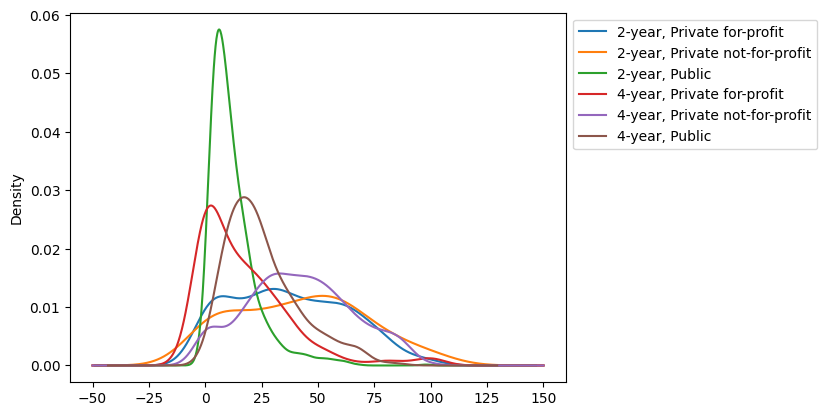

In [41]:
# Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control.
# Make a grouped kernel density plot.
# Which institutions appear to have the best graduation rates?

df['levelXcontrol'] = df['level'] + ', ' + df['control']
df.groupby(['levelXcontrol'])['grad_100_value'].plot.kde()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [42]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

Public 2 year schools have the worst graduation rates followed by private for profit 4 year schools and public four year schools. Private not for profit schools have the best graduation rate around 40% for both 2 and 4 year programs.

<Axes: ylabel='Density'>

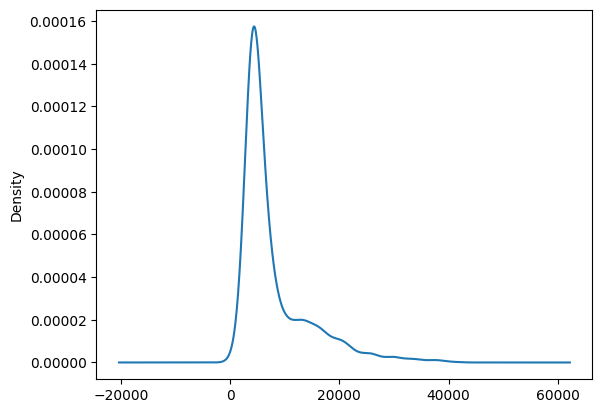

In [43]:
# Make a kernel density plot of aid_value. Now group your graph by level and control.
# What explains the shape of the graph?
# Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

df['aid_value'].plot.kde()

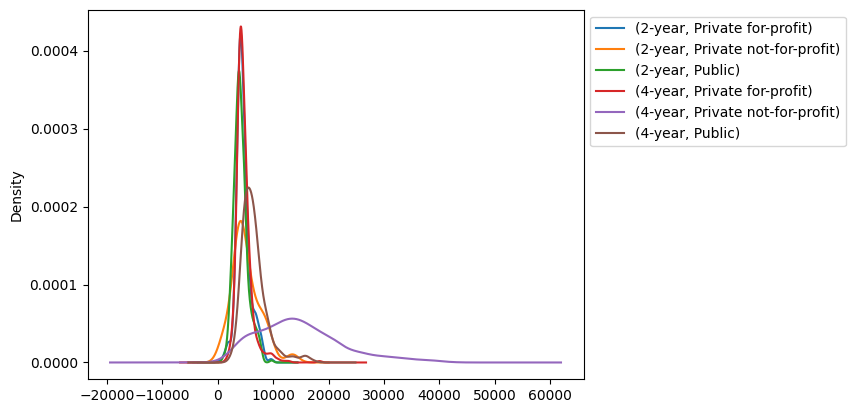

In [44]:
df.groupby(['level','control'])['aid_value'].plot.kde()

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [45]:
df.groupby(['level','control'])['aid_value'].describe()

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

The density is highly concentrated in one area because a majority of student aid is less than $10,000 in value.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

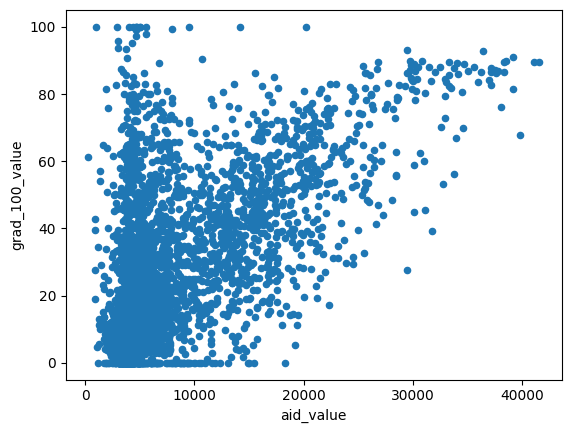

In [46]:
#Make a scatterplot of grad_100_value by aid_value. Describe what you see.

df.plot.scatter(x='aid_value', y='grad_100_value')

Most observations have low financial aid and grad rate values. However, it does appear that as financial aid increases graduation rate increases.

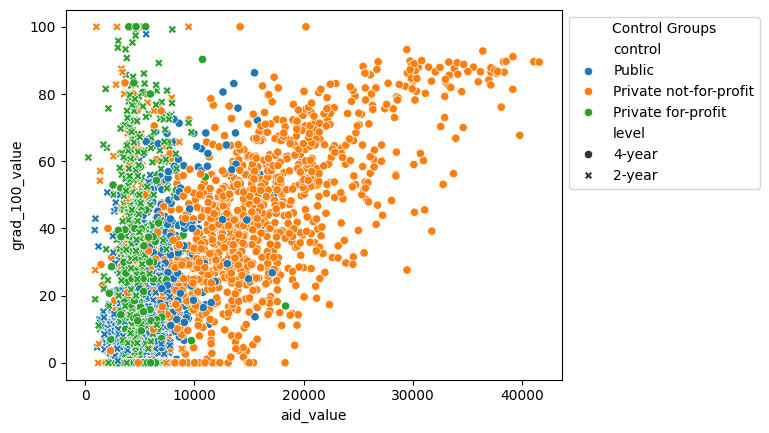

In [51]:
# Now make the same plot, grouping by level and then control.
# Describe what you see.
# For which kinds of institutions does aid seem to increase graduation rates?


sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control', style='level')

plt.legend(title='Control Groups', loc='upper left', bbox_to_anchor=(1, 1))


Private not for profit 4 year schools give out the largest financial aid and drive the trend of increasing graduation rate with increasing financial aid. Private for profit schools give out less aid and see no graduation rate increase. Public 4 year schools give out more aid than 2 year schools and also see some graduation rate increase with financial aid increase.

## ***Question 4***

Pick a dataset about something you are interested in. Download the data and data dictionary.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Opoid Prescribing Rates Geo 2022.csv', low_memory = False)
#df = pd.DataFrame(df)


Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

The dictionary does not specify how missing numeric values are handled or the missing value codes for categorical variables. Lets hope nothing is missing.

The data dictionary is informative and straightforward enough to understand. The variable names make sense and their definition gives guidance to potentially tricky interpretation. The lack of information about missing values is a concern.

In [ ]:
# Pick out a few interesting variables, and explain why you find them jointly interesting.
# Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

In [57]:
df.head()

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2013,National,,National,All,33471552.0,506882862.0,6.60,NaN,NaN,2605496.0,7.78,NaN,NaN
1,2013,National,,National,FFS,15528221.0,240661427.0,6.45,NaN,NaN,1363671.0,8.78,NaN,NaN
2,2013,National,,National,MC,17943331.0,266221435.0,6.74,NaN,NaN,1241825.0,6.92,NaN,NaN
3,2013,State,56,Wyoming,All,41202.0,529696.0,7.78,NaN,NaN,4230.0,10.27,NaN,NaN
4,2013,State,38,North Dakota,All,39906.0,588978.0,6.78,NaN,NaN,3472.0,8.70,NaN,NaN


In [ ]:
df.info()

I am most interested in comparing opoid prescribing rate and change in opiod prescribing rate by state.

In [94]:
nearby_states = ['Virginia', 'West Virginia', 'Maryland', 'North Carolina', 'Kentucky', 'Tennesse', 'Pennsylvania']

#Chat Gpt
df['Geo_Lvl'] = df['Geo_Lvl'].str.lower().str.strip()
df['Geo_Desc'] = df['Geo_Desc'].str.strip()

state_df = df[df['Geo_Lvl'] == 'state']

state_df = state_df[state_df['Geo_Desc'].str.lower().isin([state.lower() for state in nearby_states])]


Decided to only include some states. I tried more however the graphs were hard to decipher so thought I would just look at our area.

In [103]:
state_df.head()

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
24,2013,state,21,Kentucky,All,262896.0,4978458.0,5.28,NaN,NaN,12198.0,4.64,NaN,NaN
26,2013,state,54,West Virginia,All,401118.0,5794848.0,6.92,NaN,NaN,22227.0,5.54,NaN,NaN
35,2013,state,24,Maryland,All,762388.0,10413094.0,7.32,NaN,NaN,72846.0,9.56,NaN,NaN
36,2013,state,51,Virginia,All,730742.0,10508281.0,6.95,NaN,NaN,51828.0,7.09,NaN,NaN
44,2013,state,37,North Carolina,All,1217388.0,15508160.0,7.85,NaN,NaN,110673.0,9.09,NaN,NaN


In [ ]:
print(state_df)

<Axes: xlabel='Opioid_Prscrbng_Rate_5Y_Chg', ylabel='Opioid_Prscrbng_Rate'>

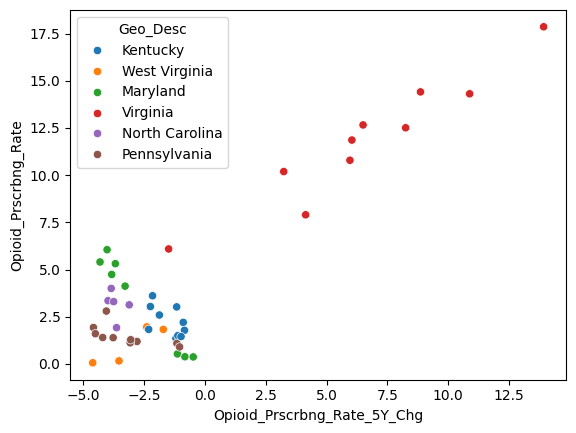

In [95]:
sns.scatterplot(data=state_df, x='Opioid_Prscrbng_Rate_5Y_Chg', y='Opioid_Prscrbng_Rate', hue='Geo_Desc')

<Axes: xlabel='Geo_Desc'>

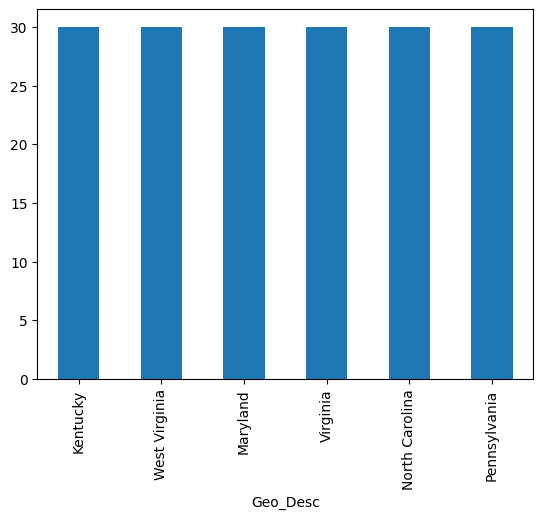

In [100]:
state_num = state_df['Geo_Desc'].value_counts()
state_num.plot.bar()

<Axes: >

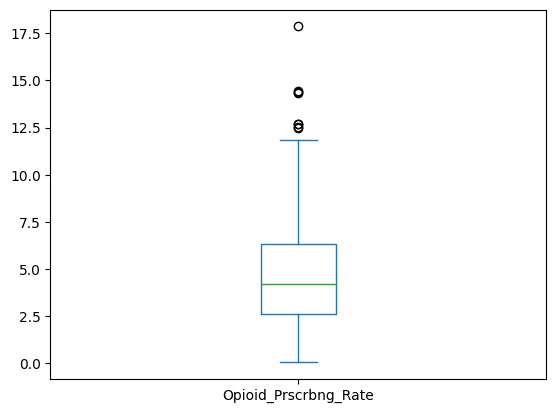

In [102]:
state_df['Opioid_Prscrbng_Rate'].plot.box()

<Axes: >

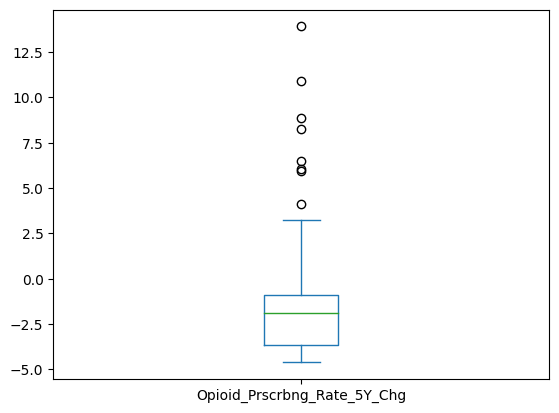

In [104]:
state_df['Opioid_Prscrbng_Rate_5Y_Chg'].plot.box()

There are outliers shown in both box plots, they are all high outliers are there seem to be relatively few.

<Axes: xlabel='Year'>

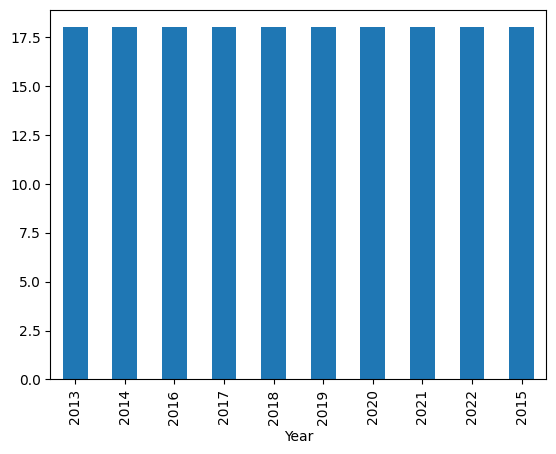

In [107]:
years = state_df['Year'].value_counts()
years.plot.bar()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Opioid_Prscrbng_Rate', ylabel='Density'>

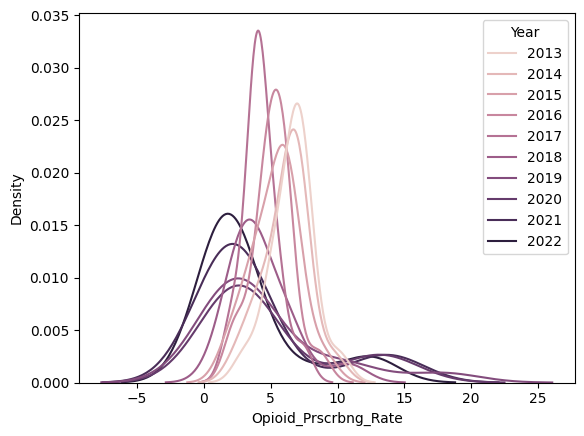

In [108]:
sns.kdeplot(data=state_df, x='Opioid_Prscrbng_Rate', hue='Year')

It appears that opioid prescribing rate is decreasing overall from 2013 to 2022. However, more recent years do show the highest prescribing rates though not particularly many of them.

<Axes: xlabel='Tot_Opioid_Clms', ylabel='Tot_Clms'>

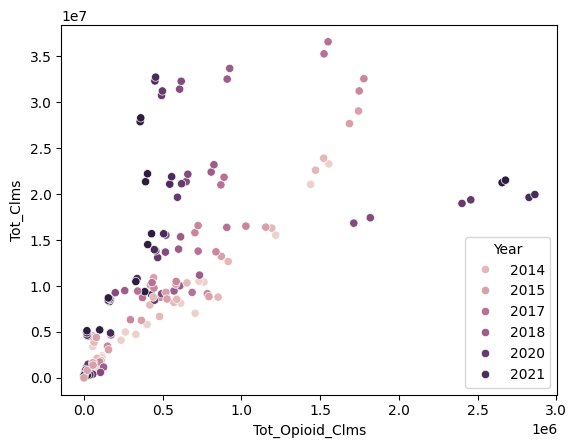

In [121]:
sns.scatterplot(data=state_df, x='Tot_Opioid_Clms', y='Tot_Clms', hue='Year')

Overall from 2014 to 2021, opioid claims made about a proportionally smaller amount of total claims. However, the highest proportions of opioid claims were recorded in 2020 and 2021.

In [123]:
state_df.describe()

,Year,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
count,180.000000,1.740000e+02,1.800000e+02,160.000000,49.000000,95.000000,1.700000e+02,162.000000,75.000000,144.000000
mean,2017.500000,5.502332e+05,1.105832e+07,4.864250,-0.716735,-0.266632,1.398015e+05,15.789012,13.208667,1.540417
std,2.880293,5.985091e+05,9.347303e+06,3.156337,4.353263,1.528821,4.406800e+05,22.357254,28.907850,8.078506
min,2013.000000,0.000000e+00,0.000000e+00,0.060000,-4.610000,-3.960000,0.000000e+00,2.370000,-8.030000,-12.310000
25%,2015.000000,7.329675e+04,2.884441e+06,2.617500,-3.680000,-0.810000,8.223750e+03,5.730000,-1.545000,-0.422500
50%,2017.500000,4.413000e+05,9.141236e+06,4.215000,-1.870000,-0.420000,2.930550e+04,9.585000,0.130000,0.010000
75%,2020.000000,7.250542e+05,1.636244e+07,6.347500,-0.890000,-0.060000,7.794525e+04,11.557500,1.970000,0.570000
max,2022.000000,2.863521e+06,3.654353e+07,17.860000,13.920000,7.070000,2.487856e+06,91.950000,84.240000,50.320000


On average, opioid prescribing rate has slightly decreased over the last 5 years and over the last year. The average prescribing rate is 4.8% while the minimum is 0.06% and maximum was 17.86%. These numbers represent the percentage of medicare claims for opioid prescriptions from total medicare claims. Looking at it now I should have removed the outliers.